# TP1 du module 5 : l'apprentissage supervisé

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
* Préparer des jeux de données pour l'apprentissage supervisé
* Entraîner un modèle d'arbre de décision
* Evaluer les performances d'un modèle de classification
* Entraîner et évaluer un modèle de régression

In [5]:
# Ajoutez ici les imports de librairies nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

## Création de modèles de classification pour le Titanic

1. Commencez par recharger votre jeu de données sur le Titanic, à partir du csv que vous aviez enregistré à la fin du TP du module 4. Ainsi, vous obtenez un jeu de données déjà préparé pour l'apprentissage.

In [6]:
titanic = pd.read_csv("Titanic.csv")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Family      891 non-null    int64  
 5   Sex_male    891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Embarked_U  891 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


2. Séparer vos données en mettant d'un côté les attributs, de l'autre la cible à prédire. Ensuite, séparer encore ces groupes entre entraînement et test (proportion de 0.2)

In [7]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("Taille de données initials :", len(titanic))
print('Nombre de données d\'entrainement', len(X_train), ", propotion", len(X_train)*100/len(titanic), '%')
print("Nombre de données de test :", len(X_test), ", proportion", len(X_test)*100/len(titanic), '%')

Taille de données initials : 891
Nombre de données d'entrainement 712 , propotion 79.91021324354658 %
Nombre de données de test : 179 , proportion 20.089786756453424 %


3. Créez un arbre de décision, sans option particulière pour l'instant. Entraînez-le, puis évaluez-le à l'aide de l'accuracy, sur les jeux de données crées ci-dessus. Comparez ce score avec le score moyen obtenu en effectuant une validation croisée sur l'ensemble du jeu de données.

In [8]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = cross_val_score(model, X, y, cv=5)

print("Scores de la validation croisé :", score.mean())
print("Accuracy score croisé: ", accuracy_score(y_test, y_pred))


Scores de la validation croisé : 0.7867679367271359
Accuracy score croisé:  0.7932960893854749


4. Calculer également la précision et le rappel. Cherchez notamment dans la documentation comment indiquer laquelle des deux classes considérer comme la classe positive. Quelles observations pouvez-vous faire ?

In [9]:
print("Precision score : ", precision_score(y_test, y_pred, pos_label=1))
print("Recall score : ", recall_score(y_test, y_pred, pos_label=1))

Precision score :  0.746268656716418
Recall score :  0.7142857142857143


**Observation** : selon la documentationil y a un argument a ajouter qui est `pos_label` pour indiquer le label positif. Il fonctionne de pair avec l'argument `average`. Nos données etant binaire `average` a la valeur `binary` et `pos_label` a la valeur 1 par defaut. La valeur 1 correspond à la survie du passager, la classe  à considerer comme positive est la survie comme 

5. Afficher la matrice de confusion pour cet arbre de décision, sur le jeu de test. Commencez par simplement l'afficher de manière textuelle, puis travailler votre affichage à l'aide de matplotlib afin d'ajouter des couleurs relatives au nombre d'éléments dans chaque case de la matrice.

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 17]
 [20 50]]


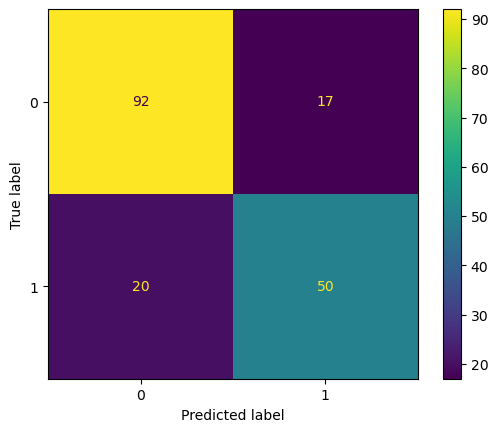

In [11]:
"""disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()"""
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

6. Quelle est la profondeur de l'arbre de décision que vous avez créé ?

In [12]:
model.get_depth()

17

7. Créer un deuxième arbre de décision, en limitant sa profondeur à trois niveaux. Affichez son accuracy sur les données de test : que constatez-vous, et comment pouvez-vous l'expliquer ?

In [13]:
titanic1 = DecisionTreeClassifier(max_depth=3)
titanic1.fit(X_train, y_train)
y_pred = titanic1.predict(X_test)

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.8044692737430168


8. Visualisez ce nouvel arbre de décision : prenez garde à bien faire apparaître les labels du jeu de données, et remplacez les valeurs 0 et 1 par des labels textuels de votre choix (ex : 'Died' et 'Survived'). Quelles observations pouvez-vous faire sur cet arbre ? Les décisions vous paraissent-elles cohérentes avec l'analyse des données faites dans le module 4 ?

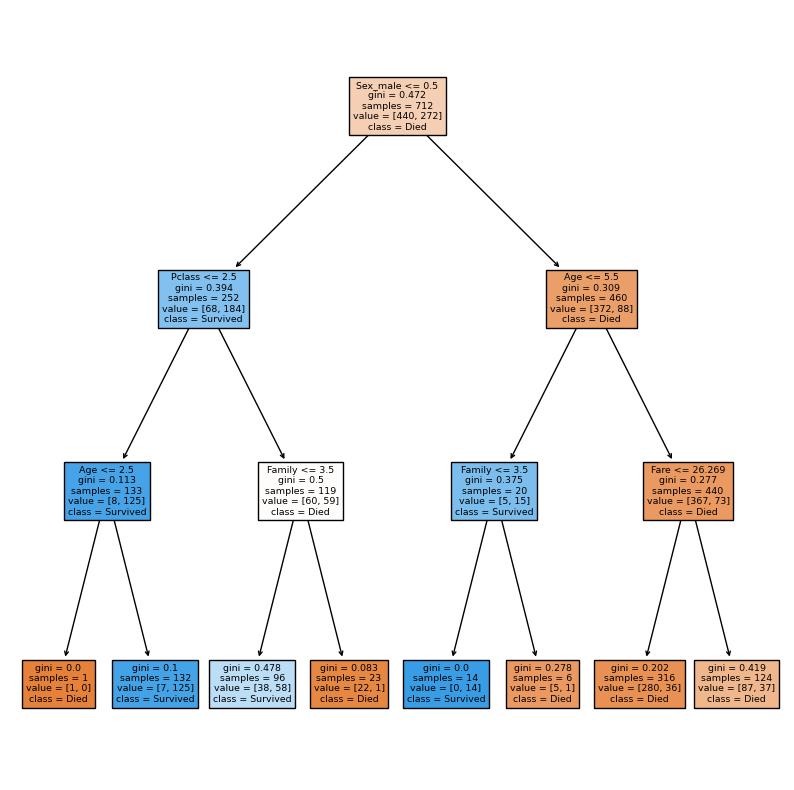

In [14]:
titanic1.fit(X_train, y_train)
fig = plt.figure(figsize=(10,10))
plot_tree(titanic1, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()

9. Vous allez à présent comparer les performances d'arbre de profondeurs différentes. Créez différents arbre, en faisant varier la profondeur entre 1 et la profondeur trouvée à la question 6. Pour chaque arbre, calculer son score (accuracy) à l'aide d'une validation croisée à 5 feuilles. Sur un graphique, représentez l'évolution du score en fonction de la profondeur de l'arbre. 
Affichez également la profondeur pour lequel le score est maximal.
Qu'observez-vous ?

In [15]:
accuracy_scores = []
for depth in range(1, 17):
    model = DecisionTreeClassifier(max_depth=depth)
    score = cross_val_score(model, X, y, cv=5).mean()
    score.append(accuracy_scores)

plt.plot(range(1,17), accuracy_scores)
plt.xticks(range(1,17))
plt.xlabel("Profondeur du modele")
plt.ylabel("Accuracy")
plt.title("Accuracy du model")


AttributeError: 'numpy.float64' object has no attribute 'append'

10. Comparez deux critères pouvant être utilisé pour constuire l'arbre de décision : coefficient de gini et mesure d'entropie. Pour la profondeur de l'arbre,
Avec un validation croisée, affichez sur un histogramme les trois valeurs moyennes obtenues. Voyez-vous un critère qui se détache des autres par ses performances ?

In [16]:
CRITERIA = ("gini", "entropy")

scores = []

for criterion in CRITERIA:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    score = cross_val_score(model, X, y, cv=5).mean()
    scores.append(score)

plt.bar(CRITERIA, scores)
plt.title("Accuracy en fonction du critère")
plt.xlabel("Critère")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'max_depth' is not defined

## Créer un modèle de regression

Pour tester le concept de modèle de régression, nous ne pouvons pas utiliser le jeu de données sur le Titanic. A la place, nous allons nous intéresser à un jeu de données présentant l'évolution de la maladie chez des patients diabétiques. L'objectif sera de prédire l'évolution de la maladie en un an, en se basant sur des données mesurées un an avant. Ce jeu de données est directement disponible via la librairie scikit-learn. Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

1. Commencez par charger les données dans deux dataframe : un pour les attributs, un pour la cible à prédire.

In [11]:
diabetes = load_diabetes()

# DataFrame pour les attributs (features)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# DataFrame pour les cibles (targets)
y = pd.DataFrame(diabetes.target, columns=['target'])

# Afficher les DataFrame créés
print("DataFrame des attributs (X):")
print(X)  

print("\nDataFrame des cibles (y):")
print(y)

DataFrame des attributs (X):
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002

2. Affichez les premières lignes des attributs. Avez-vous bien repéré contenant la valeur à prédire ?

In [12]:
print(X.head()) 

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


3. Commencez par effectuer une régression linéaire, en prenant bien soin d'avoir des données d'entraînement et de test. Quelle erreur quadratique moyenne obtenez-vous ? Comment analysez-vous ce résultat ?

In [17]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

linear_regrassion_momdel = LinearRegression()
linear_regrassion_momdel.fit(X_train, y_train)

y_pred = linear_regrassion_momdel.predict(X_test)
print("Erreur quadratique moyenne :", mean_squared_error(y_test, y_pred))

Erreur quadratique moyenne : 3654.7832827370944


les donées sont corrompue

4. Faites une représentation graphique des données réelles par rapport aux données prédites par le modèle : pour chaque attribut, représentez graphiquement les valeurs sur l'abscisse, et l'évolution de la maladie (réelle et prédite) sur les ordonnées. Colorez différement les données en fonction de si elles sont réelles ou prédites.

In [61]:
# y_pred, y_test
plt.scatter(X['age'], y_test, color='r', label="Donnée réelles")
plt.scatter(X['age'],y_pred, color='r', label="Donnée predi")

KeyError: 'age'

5. Sur un seul graphe, affichez les valeurs prédites en fonction des valeurs réelles. Tracez également la droite d'équation y=x. Quelles observations faites-vous ?

6. Pour une régression linéaire, les valeurs sur les attributs sont cruciales. Par défaut lorsque vous avez chargé vos données avec Scikit-learn, celles-ci était normalisées. Rechargez-les en ajoutant l'option pour obtenir les données brutes. Affichez les premières lignes du dataset pour constater les différences de plage de valeurs.

In [67]:
diabetes_brut = load_diabetes(scaled=False)

# DataFrame pour les attributs (features)
X = pd.DataFrame(diabetes_brut.data, columns=diabetes_brut.feature_names)

# DataFrame pour les cibles (targets)
y = pd.DataFrame(diabetes_brut.target, columns=['target'])

# Afficher les DataFrame créés
print("DataFrame des attributs (X):")
print(X)  

print("\nDataFrame des cibles (y):")
print(y)

DataFrame des attributs (X):
      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0

[442 rows x 10 columns]

DataFrame des cibles (y):
     target
0     151.0
1      75.0
2     141.0
3     206.0
4     135.0
..     

7. Réentraînez un modèle de régression linéaire sur ces données non normalisées? Que constatez-vous ?

In [68]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_brut.data, diabetes_brut.target, test_size=0.2)

In [69]:
linear_regrassion_momdel = LinearRegression()
linear_regrassion_momdel.fit(X_train, y_train)

y_pred = linear_regrassion_momdel.predict(X_test)
print("Erreur quadratique moyenne :", mean_squared_error(y_test, y_pred))

Erreur quadratique moyenne : 2499.6542128177025


8. Proposez des modèles de régression polynomiale : tester plusieurs degrés de polynôme, entre 1 et 20. Pour chacun, calculez le score obtenu, et affichez-le. Représentez graphiquement l'évolution de l'erreur quadratique moyenne en fonction du degré du polynome.
**Attention :** pour cet partie, réfléchissez aux données que vous voulez utiliser : normalisées ou non ?

Constatez-vous une différence avec la régression linéaire simple ?

## Régression avec un arbre de décision

Il est aussi possible d'utiliser les arbres de décision pour construire un modèle de régression. En utilisant la classe adéquate de scikit-learn, proposez un arbre de régression sur le jeu de données du diabètes. Prenez soin d'analyser la profondeur de l'arbre, afin de choisir celle qui vous parait la plus pertinente. Affichez l'arbre obtenant le meilleur score.

Comparez les résultats obtenus avec ceux de la régression linéaire et de la régression polynomiale.

In [73]:
for depth in range(1,20):
    model = DecisionTreeRegressor()
    model.fit()